In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing all datasets
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Check the data size and column size
lead_data.shape

(9240, 37)

In [5]:
# Get summary of the dataframe.
lead_data.info()

# No null values shows but some values are null based on observation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Check the value counts, this can indicate categorical columns, also provide insight into the data
for col in lead_data.columns:
    print(lead_data[col].value_counts().to_frame().sort_values(by=["count"], ascending=False))

# 1. Prospect ID and Lead number are ID columns and can be dropped
# 2. Lead Origin, Lead Source, Do Not Email, Do Not Call, Last Activity, Country, Specialization, What is your current occupation are categorical, What is your current occupation, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article etc are categorical columns
# 3. Total Visits, Total Time Spent on Website, Total Time Spent on Website, Page Views Per Visit, Asymmetrique Activity Score, Asymmetrique Profile Score, ---- are numeric columns but large majority of data are clustered. Can be converted to categorical column and check if model perform better.


# Columns with uniform data and will provide no insight. Drop those columns.
# I agree to pay the amount through cheque
# Get updates on DM Content
# Update me on Supply Chain Content
# Receive More Updates About Our Courses

# Very skewed data, to be useful. Drop those columns.
# Through Recommendations
# Digital Advertisement
# Newspaper
# X Education Forums
# Newspaper Article
# Magazine
# Search
# Do Not Call

                                      count
Prospect ID                                
7927b2df-8bba-4d29-b9a2-b6e0beafe620      1
d9ed7525-5cf0-45ba-87c2-ca2bca521874      1
30422ea1-36fe-465e-9e68-41ee190fefb3      1
cfa0128c-a0da-4656-9d47-0aa4e67bf690      1
8cc8c611-a219-4f35-ad23-fdfd2656bd8a      1
...                                     ...
3f715465-2546-47cd-afa8-8b8dc63b8b43      1
c0b25922-511f-4c56-852e-ced210a45447      1
19d6451e-fcd6-407c-b83b-48e1af805ea9      1
82a7005b-7196-4d56-95ce-a79f937a158d      1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff      1

[9240 rows x 1 columns]
             count
Lead Number       
660737           1
657379           1
660321           1
660624           1
660727           1
...            ...
579622           1
579615           1
579564           1
579546           1
579533           1

[9240 rows x 1 columns]
                         count
Lead Origin                   
Landing Page Submission   4886
API                       3580
Lead Ad

In [7]:
# Check summary statistics of data frame.
lead_data.describe()

# Lead number to be dropped. Others looks good and 50 percentile and mean are similar, need to check for outliers

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Drop 'Prospect ID' and 'Lead Number' as they are ID columns will be doppped after test train split

# Following columns have same value in all rows. Hence drop the rows
# I agree to pay the amount through cheque
# Get updates on DM Content
# Update me on Supply Chain Content
# Receive More Updates About Our Courses
lead_data = lead_data.drop(['I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses'],axis=1)

# Very skewed data, to be useful. Drop those columns.
# Through Recommendations
# Digital Advertisement
# Newspaper
# X Education Forums
# Newspaper Article
# Magazine
# Search
# Do Not Call

lead_data = lead_data.drop(['Through Recommendations', 'Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Magazine','Search','Do Not Call'] ,axis=1)

lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [9]:
# Based on business knowledge the value select is missing value so replace with null
# Columns with Select values
# How did you hear about X Education
# Specialization
# Lead Profile
# City

# Convert null values to mode of the column for City and Country

lead_data['How did you hear about X Education'] = lead_data['How did you hear about X Education'].replace({'Select': np.nan, 'select': np.nan})
lead_data['Specialization'] = lead_data['Specialization'].replace({'Select': np.nan, 'select': np.nan})
lead_data['Lead Profile'] = lead_data['Lead Profile'].replace({'Select': np.nan, 'select': np.nan})
lead_data['City'] = lead_data['City'].replace({'Select': 'Mumbai', 'select': 'Mumbai'})
lead_data['Country'] = lead_data['Country'].replace({'Select': 'India', 'select': 'India', np.nan: 'India'})

lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,NaN,Mumbai,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,NaN,Mumbai,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [10]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [11]:
# Map yes and no 1 and 0 for all columns

for col in lead_data.columns:
    lead_data[col] = lead_data[col].replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})

lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,NaN,Mumbai,02.Medium,02.Medium,15.0,15.0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,NaN,Mumbai,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,Modified


In [12]:
# Check the data types
lead_data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                       int64
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Tags                                              object
Lead Quality                                      object
Lead Profile                   

In [13]:
# Followig are categorical columns:
# "Lead Origin", "Lead Source", "Last Activity", "Country", "Specialization", "How did you hear about X Education","What is your current occupation", "What matters most to you in choosing a course", "Tags", "Lead Quality", "Lead Profile", "City", "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Last Notable Activity"


In [14]:
# Get the missing values data in dataframe
missing_vals = lead_data.isnull().sum()  / lead_data.shape[0] * 100

In [15]:
# Features with small number of missing values. Those rows can be dropped
missing_vals[(missing_vals < 2) & (missing_vals > 0)]

Lead Source             0.389610
TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
dtype: float64

In [16]:
# Drop the lead source null rows as they are very small in number compared to the whole dataset
lead_data = lead_data[~lead_data['Lead Source'].isnull()]
lead_data.shape

(9204, 25)

In [17]:
# Check the row count of the null values for features identified to be dropped. Notice that most of the rows are common rows  
print(lead_data[lead_data['TotalVisits'].isnull()].shape)
print(lead_data[lead_data['Page Views Per Visit'].isnull()].shape)
print(lead_data[lead_data['Last Activity'].isnull()].shape)

print(lead_data[lead_data['TotalVisits'].isnull() & lead_data['Page Views Per Visit'].isnull()].shape)
print(lead_data[lead_data['TotalVisits'].isnull() & lead_data['Last Activity'].isnull()].shape)
print(lead_data[lead_data['Page Views Per Visit'].isnull() & lead_data['Last Activity'].isnull()].shape)

(130, 25)
(130, 25)
(101, 25)
(130, 25)
(101, 25)
(101, 25)


In [18]:
# Drop the null rows for TotalVisits,Page Views Per Visit,Last Activity as they are very small in number compared to the whole dataset
lead_data = lead_data[~lead_data['TotalVisits'].isnull()]
lead_data = lead_data[~lead_data['Page Views Per Visit'].isnull()]
lead_data = lead_data[~lead_data['Last Activity'].isnull()]
lead_data.shape

(9074, 25)

In [19]:
# Features with very large number (>40%) of missing values. We can drop those columns, as they don't appear to be very important based on business knowledge

missing_vals[(missing_vals > 20)]

Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     74.188312
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
dtype: float64

In [20]:
# Missind values > 40%
missing_vals[(missing_vals > 40)]

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [21]:
# Drop "Lead Quality" and other very hign missing value columns
lead_data = lead_data.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1) 
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,NaN,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,0,Modified


In [22]:
# Check the missing values again
missing_vals = lead_data.isnull().sum()  / lead_data.shape[0] * 100
missing_vals

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                   36.169275
What is your current occupation                  29.567996
What matters most to you in choosing a course    29.777386
Tags                                             36.665197
City                                             15.638087
A free copy of Mastering The Interview            0.0000

In [23]:
# Drop columns: city and Tags for too many missing values and doesn't make much business sense
lead_data = lead_data.drop(['City','Tags'], axis=1)

In [24]:
lead_data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                       int64
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
A free copy of Mastering The Interview             int64
Last Notable Activity                             object
dtype: object

In [25]:
# Replace null values with mode of the categorical column
# Get categorical columns
categorical_cols = lead_data.dtypes[lead_data.dtypes == 'object'].reset_index()['index'].tolist()
# Remove the Prospect ID
categorical_cols.remove('Prospect ID')

# Replace all null values incategorical columns with mode
for col in categorical_cols:
    mode = lead_data[col].mode()[0]
    lead_data[col] = lead_data[col].replace({'Select': mode, 'select': mode, np.nan: mode})

# Check the missing values again
missing_vals = lead_data.isnull().sum()  / lead_data.shape[0] * 100
missing_vals

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

In [26]:
# The country data is very skewed hence converting india and non-india
lead_data.loc[lead_data["Country"] != 'India', 'Country'] = 'Out of India'
lead_data["Country"].value_counts()

Country
India           8787
Out of India     287
Name: count, dtype: int64

In [27]:
# Get numerical rows
numerical_cols = lead_data.dtypes[lead_data.dtypes != 'object'].reset_index()['index'].tolist()
# Lead number is key columns hence removed
numerical_cols.remove('Lead Number')
numerical_cols

['Do Not Email',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview']

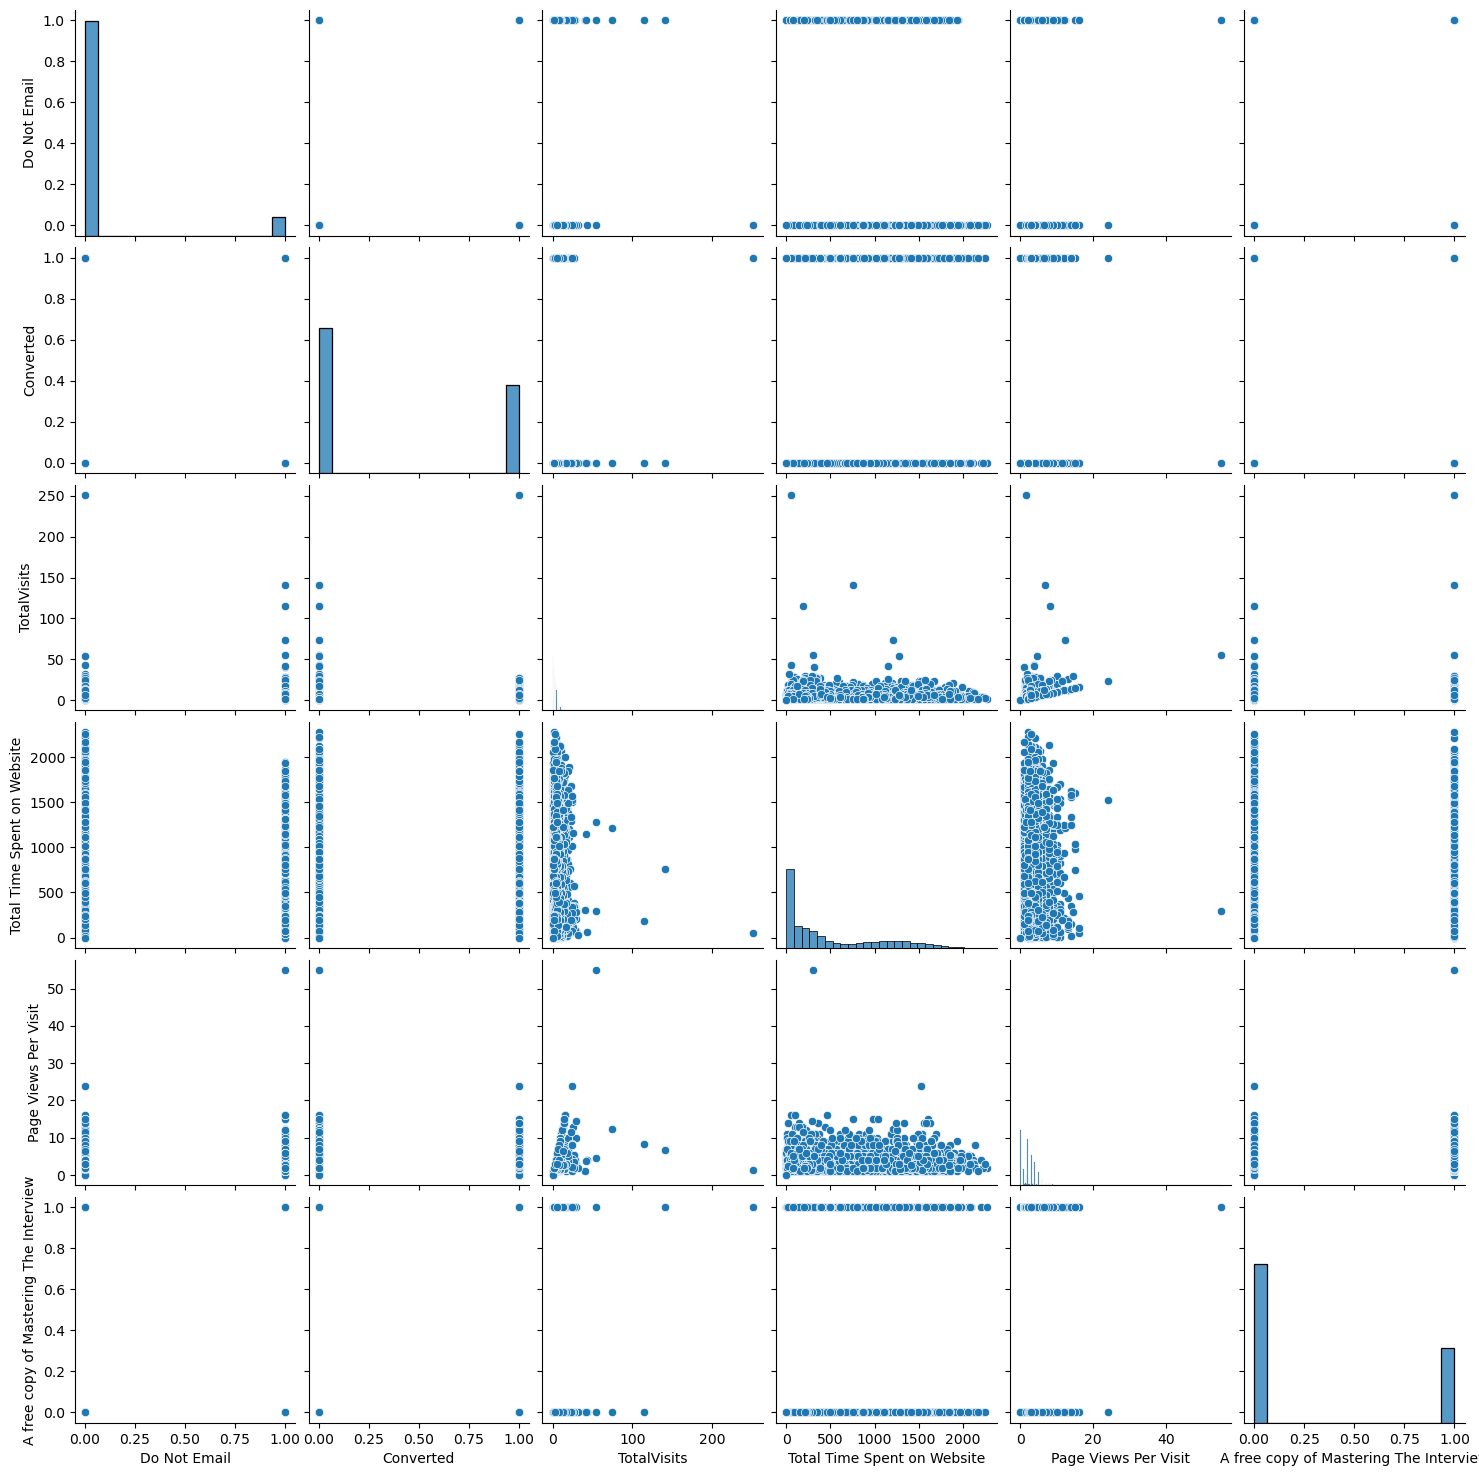

In [28]:
# Get pair plots of all number columns, to discover any relation and discover data pattern
sns.pairplot(lead_data[numerical_cols])
plt.show()

# Some correlations are observed, will be more clear in heat map

In [29]:
# Get correlation between numerical columns to discover any relation
corr = lead_data[numerical_cols].corr()
corr

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
Do Not Email,1.000000,-0.140786,0.035715,-0.046192,0.036403,0.058023
Converted,-0.140786,1.000000,0.032855,0.359261,0.000260,-0.030860
TotalVisits,0.035715,0.032855,1.000000,0.219723,0.511068,0.201064
Total Time Spent on Website,-0.046192,0.359261,0.219723,1.000000,0.318350,0.177435
Page Views Per Visit,0.036403,0.000260,0.511068,0.318350,1.000000,0.275664
A free copy of Mastering The Interview,0.058023,-0.030860,0.201064,0.177435,0.275664,1.000000


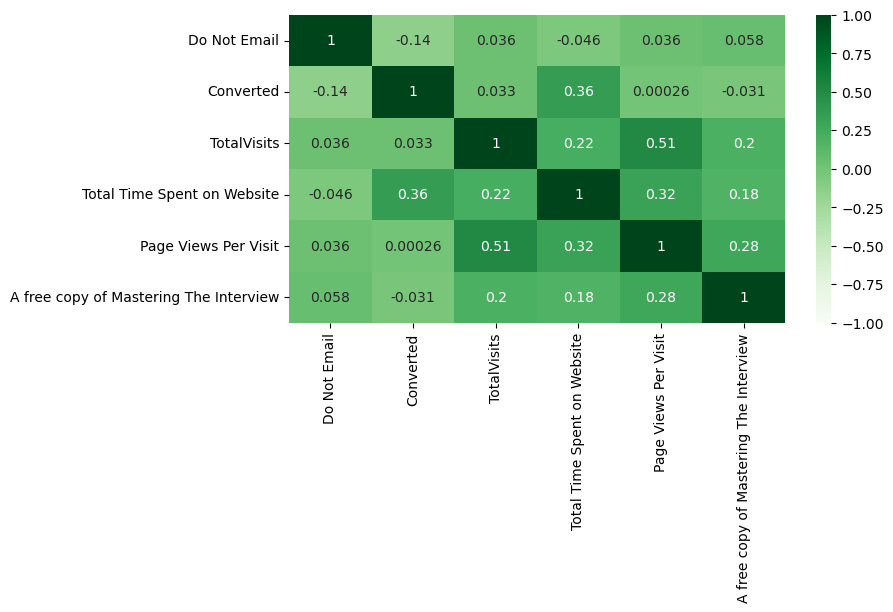

In [30]:
# Plot heatmap of the correlation of numerical columns and with target variable
plt.figure(figsize=(8, 4))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='Greens') 
plt.show()

# Some strong correlations exist
# Note: target variable is correlated with Do Not Email, Total Visits, Total Time Spent on Website, A free copy of mastering the interview

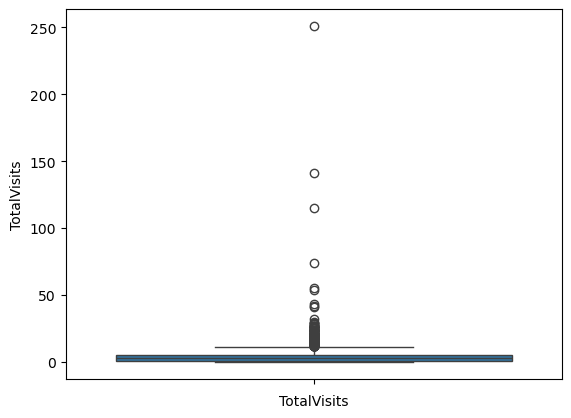

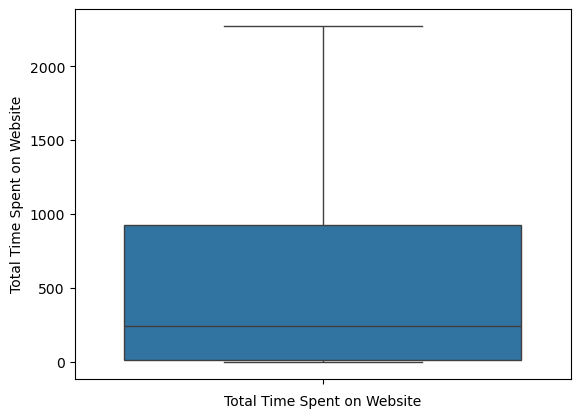

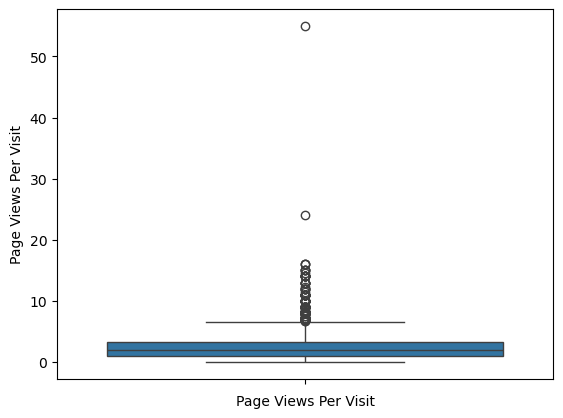

In [31]:
# Get box plots of all quantitative columns, to detect outliers
quantitative_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

for col in quantitative_cols:
    sns.boxplot(y=col, data=lead_data)
    plt.xlabel(col)
    plt.ylabel(col)
    plt.show()

# Although some values are slightly ouside rage they cannot be called outliers and they are valid values

In [32]:
# View all categorical columns for plotting the bar chart, looping doesn't show the full plot for screenshot
categorical_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Last Notable Activity']

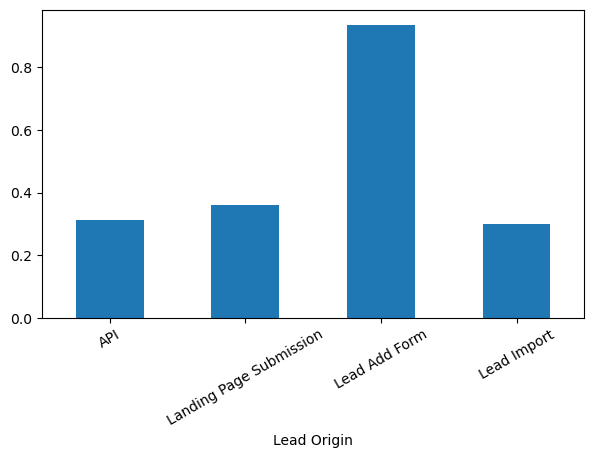

In [33]:
# Understand the correlation between Lead Origin and target, with bar chart
# 'Lead Add Form' have highest conversion rate
plt.figure(figsize=(7, 4))
relation_target = lead_data.groupby(by=['Lead Origin'])["Converted"].mean()
fig = relation_target.plot.bar()
plt.xticks(rotation=30)
plt.show()

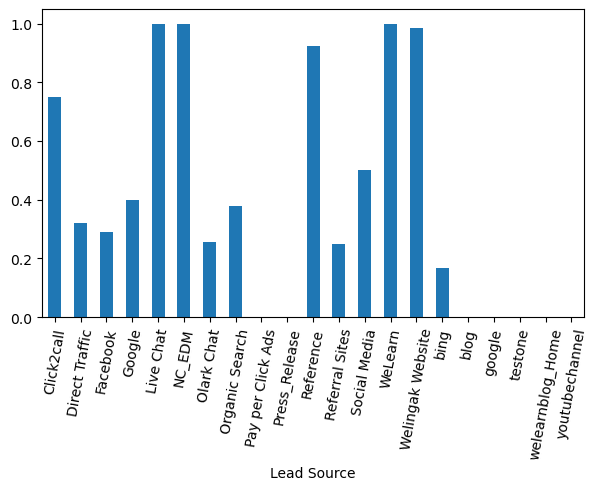

In [34]:
# Understand the correlation between Lead Source and target, with bar chart
# 'Live Chat', NC_EDM, We Learn, Welingak Website: have highest conversion rate
plt.figure(figsize=(7, 4))
relation_target = lead_data.groupby(by=['Lead Source'])["Converted"].mean()
relation_target.plot.bar()
plt.xticks(rotation=80)
plt.show()

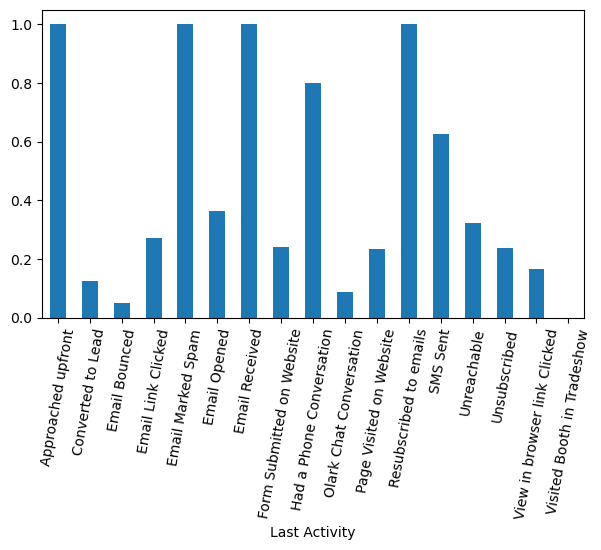

In [35]:
# Understand the correlation between Last Activity and target, with bar chart
# 'Approached upfront', Email Marked Spam, Resubscribed to email: have highest conversion rate
plt.figure(figsize=(7, 4))
relation_target = lead_data.groupby(by=['Last Activity'])["Converted"].mean()
relation_target.plot.bar()
plt.xticks(rotation=80)
plt.show()

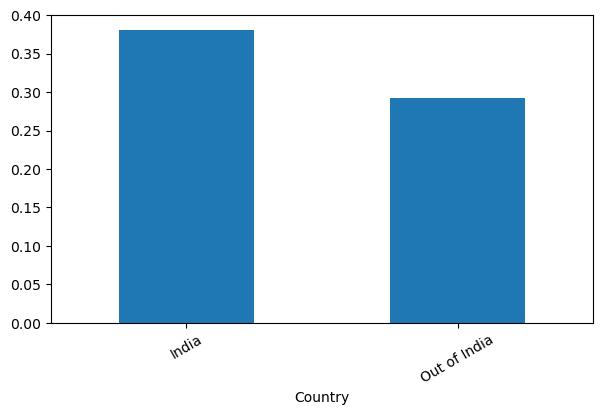

In [36]:
# Understand the correlation between Country and target, with bar chart
# 'India' have highest conversion rate over non Indian leads
plt.figure(figsize=(7, 4))
relation_target = lead_data.groupby(by=['Country'])["Converted"].mean()
relation_target.plot.bar()
plt.xticks(rotation=30)
plt.show()

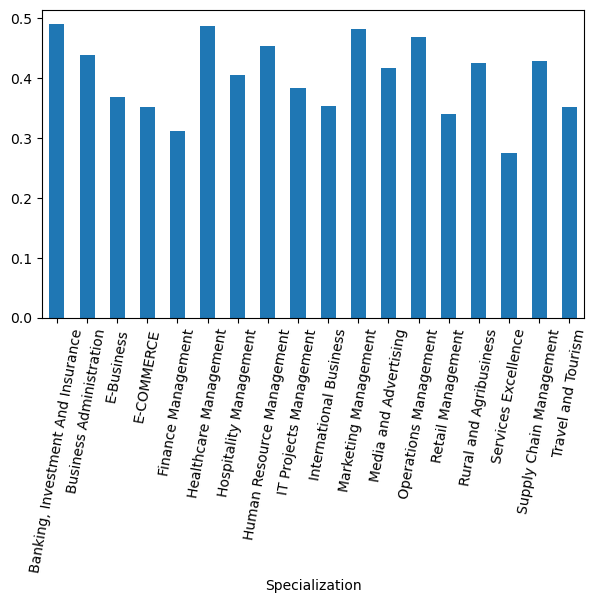

In [37]:
# Understand the correlation between Specilization and target, with bar chart
# 'Banking/investment', 'healthcare', business administration,marketing,operations: have highest conversion rate
plt.figure(figsize=(7, 4))
relation_target = lead_data.groupby(by=['Specialization'])["Converted"].mean()
relation_target.plot.bar()
plt.xticks(rotation=80)
plt.show()

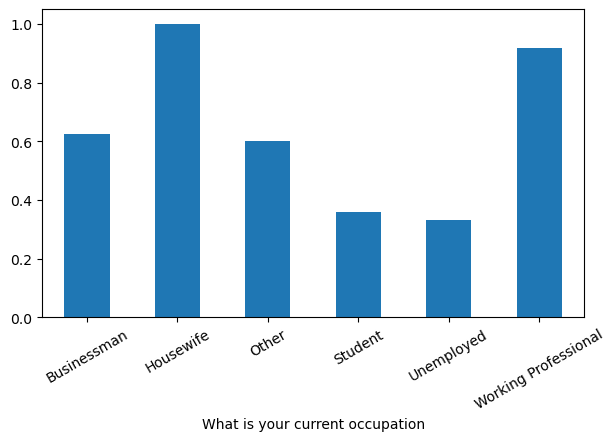

In [38]:
# Understand the correlation between occupation and target, with bar chart
# 'housewife' and working prefessional: have highest conversion rate
plt.figure(figsize=(7, 4))
relation_target = lead_data.groupby(by=['What is your current occupation'])["Converted"].mean()
relation_target.plot.bar()
plt.xticks(rotation=30)
plt.show()

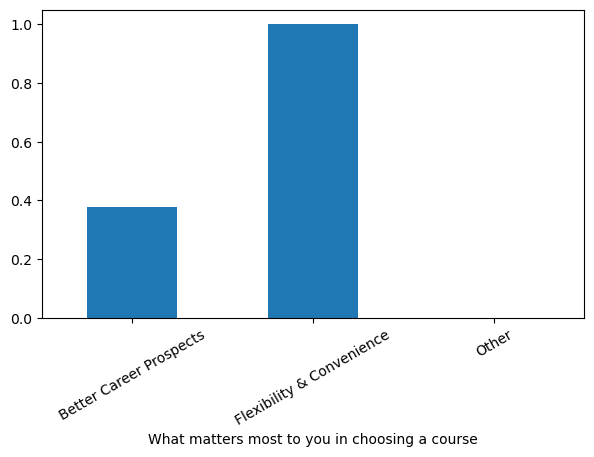

In [39]:
# Understand the correlation between 'what matters most in cjoosing course' and target, with bar chart
# 'Flexibility and convenience' have highest conversion rate
plt.figure(figsize=(7, 4))
relation_target = lead_data.groupby(by=['What matters most to you in choosing a course'])["Converted"].mean()
relation_target.plot.bar()
plt.xticks(rotation=30)
plt.show()

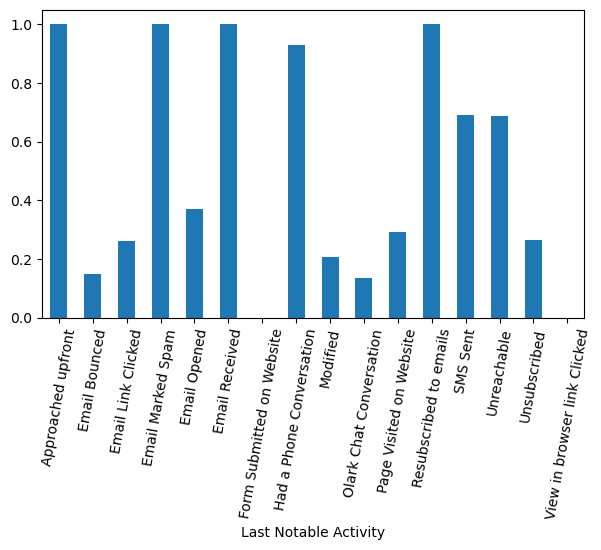

In [40]:
# Understand the correlation between Last Notable Activity and target, with bar chart
# Similar to notable activity
plt.figure(figsize=(7, 4))
relation_target = lead_data.groupby(by=['Last Notable Activity'])["Converted"].mean()
relation_target.plot.bar()
plt.xticks(rotation=80)
plt.show()

### Create the dummay columns for categorical features 

In [41]:
# Check categorical values
lead_data[categorical_cols].head(3)

,Lead Origin,Lead Source,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,Modified
1,API,Organic Search,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,India,Business Administration,Student,Better Career Prospects,Email Opened


In [42]:
# Check the value counts, this provide insight into the data
for col in categorical_cols:
    print(lead_data[col].value_counts().to_frame().sort_values(by=["count"], ascending=False))

                         count
Lead Origin                   
Landing Page Submission   4885
API                       3578
Lead Add Form              581
Lead Import                 30
                   count
Lead Source             
Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
bing                   6
google                 5
Click2call             4
Press_Release          2
Social Media           2
Live Chat              2
youtubechannel         1
testone                1
Pay per Click Ads      1
welearnblog_Home       1
WeLearn                1
blog                   1
NC_EDM                 1
                              count
Last Activity                      
Email Opened                   3432
SMS Sent                       2716
Olark Chat Conversation         972
Page Visited on Website         640
Converted to Lead      

In [43]:
# Create dummy variables for all categorical cols
categorical_dummies = pd.get_dummies(lead_data[categorical_cols], drop_first = True).astype('int64')
categorical_dummies.head(3)

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Add dummy variables in dataset
lead_data = pd.concat([lead_data, categorical_dummies], axis = 1)
lead_data.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Drop categorical columns
lead_data = lead_data.drop(categorical_cols, axis=1)
lead_data.head(3)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# View dataset
lead_data.head(3)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Split the data into train and test data using scikit-learn
from sklearn.model_selection import train_test_split

# Random seed specified, so that the train and test data set always have the same rows
np.random.seed(0)
# split data 70-30
df_train, df_test = train_test_split(lead_data, train_size = 0.7, test_size = 0.3, random_state = 100)

# display data after split
print(df_train.head())
print("--------------------------------------------------------------------------------------------")
print(df_test.head())

                               Prospect ID  Lead Number  Do Not Email  \
3009  42a4d521-df88-4b5a-b198-50594a407a2d       630949             0   
1012  4594be86-3b2e-4b55-866b-5a4b05ffd0f6       649355             1   
9226  c3bb1471-53d5-4244-b2e5-4bbb543835c1       579735             0   
4750  9bce5fbc-8d57-4dc9-8f82-fd11d94d9969       614238             0   
7987  b0bfbc32-bd4a-4376-a829-5318bc0e9547       588625             0   

      Converted  TotalVisits  Total Time Spent on Website  \
3009          0          2.0                          397   
1012          0          2.0                          190   
9226          0          0.0                            0   
4750          1          2.0                         1380   
7987          1          5.0                         1584   

      Page Views Per Visit  A free copy of Mastering The Interview  \
3009                   2.0                                       1   
1012                   2.0                            

In [48]:
# Perform scaling using max-min scaler using sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply max min scaler to all the numerical columns except dummy columns, all categorical cols are converted to dummy columns
# Fit and transform the max min scaler with training data. Same scaler will be used for test set
df_train[quantitative_cols] = scaler.fit_transform(df_train[quantitative_cols])

# Check scaled values
df_train.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,42a4d521-df88-4b5a-b198-50594a407a2d,630949,0,0,0.007968,0.178347,0.083333,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,4594be86-3b2e-4b55-866b-5a4b05ffd0f6,649355,1,0,0.007968,0.085355,0.083333,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,c3bb1471-53d5-4244-b2e5-4bbb543835c1,579735,0,0,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,9bce5fbc-8d57-4dc9-8f82-fd11d94d9969,614238,0,1,0.007968,0.619946,0.083333,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,b0bfbc32-bd4a-4376-a829-5318bc0e9547,588625,0,1,0.019920,0.711590,0.104167,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
# Separate independent and target variables in training set
y_train = df_train.pop('Converted').to_frame("Converted")
X_train = df_train
X_train.head()

,Prospect ID,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,42a4d521-df88-4b5a-b198-50594a407a2d,630949,0,0.007968,0.178347,0.083333,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,4594be86-3b2e-4b55-866b-5a4b05ffd0f6,649355,1,0.007968,0.085355,0.083333,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,c3bb1471-53d5-4244-b2e5-4bbb543835c1,579735,0,0.000000,0.000000,0.000000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,9bce5fbc-8d57-4dc9-8f82-fd11d94d9969,614238,0,0.007968,0.619946,0.083333,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,b0bfbc32-bd4a-4376-a829-5318bc0e9547,588625,0,0.019920,0.711590,0.104167,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
# Validate target variable for train set
y_train.head()

,Converted
3009,0
1012,0
9226,0
4750,1
7987,1


In [51]:
# Separate independent and target variables in test set
y_test = df_test.pop('Converted').to_frame("Converted")
X_test = df_test
X_test.head()

,Prospect ID,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,afc71cc4-67a4-42ae-89f7-779d20c5810d,628652,0,4.0,157,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,a8b4e742-2cce-4280-8549-a4a7d51a0fe2,644500,0,5.0,1513,5.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,774a3b07-491d-4311-ad51-b25cc8cc59ec,588935,0,2.0,74,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,16b63196-0da9-4b2d-974d-21d8f625f5ef,619437,0,0.0,0,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3830,cbd89429-18cd-47b1-9699-21987bd70a8e,623381,0,8.0,164,8.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# validate target variable for test set
y_test.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


### Create training models

In [53]:
# Import stats model for building logistic regression models
import statsmodels.api as sm

In [54]:
# Keep a copy for getting the ID columns at the end
X_train_original = X_train[:]

In [55]:
# Remove the ID columns
X_train = X_train.drop(['Prospect ID', 'Lead Number'],axis=1)


In [56]:
# Build first logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

# Some features have high p-value and also too many features. So use RFE for feature selection

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6270
Model Family:                Binomial   Df Model:                           80
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.1
Date:                Sat, 10 Aug 2024   Deviance:                       5120.1
Time:                        22:04:52   Pearson chi2:                 6.37e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4095
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      25.5334   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                                               -1.6260      0.227     -7.177      0.000      -2.070      -1.182
TotalVisits                                                                 9.7184      2.619      3.711      0.000       4.586      14.851
Total Time Spent on Website                                                 4.6141      0.169     27.243      0.000       4.282       4.946
Page Views Per Visit                                                       -1.4478      0.602     -2.405      0.016      -2.627      -0.268
A free copy of Mastering The Interview                                     -0.0569      0.110     -0.518      0.605      -0.272       0.158
Lead Origin_Landing Page Submission                                        -0.4347      0.118     -3.695      0.000      -0.665      -0.204
Lead Origin_Lead Add Form                                                  -0.5188      1.580     -0.328      0.743      -3.617       2.579
Lead Origin_Lead Import                                                    24.9073   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                                                 -3.0988      2.052     -1.510      0.131      -7.121       0.923
Lead Source_Facebook                                                      -26.5553   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                                         -2.7779      2.050     -1.355      0.175      -6.796       1.241
Lead Source_Live Chat                                                      21.9109   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                                         20.7430   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                                     -1.8058      2.044     -0.884      0.377      -5.811       2.200
Lead Source_Organic Search                                                 -2.9803      2.053     -1.452      0.147      -7.004       1.043
Lead Source_Pay per Click Ads                                             -24.4988   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                                                 -24.1459   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                                       1.2143      1.317      0.922      0.357      -1.367       3.795
Lea

### # Reduce the number of features using RFE

In [57]:
# Get logistic regression for RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()

In [58]:
# Create RFE instance for logistic regression, with 20 features
rfe_instance = RFE(estimator=logreg, n_features_to_select=20)

In [59]:
# Fit RFE model
rfe_instance = rfe_instance.fit(X_train, y_train)
rfe_instance.support_

array([ True,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False])

In [60]:
# Display the RFE feature selection result
list(zip(X_train.columns, rfe_instance.support_, rfe_instance.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 63),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 21),
 ('Lead Source_Facebook', False, 59),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 46),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 64),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 61),
 ('Lead Source_blog', False, 22),
 ('Lead Source_google', False, 13),
 ('Le

In [61]:
# The RFE selected columns with most predictive power
rfe_cols = X_train.columns[rfe_instance.support_]
rfe_cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [62]:
# Keep a training dataset for reference of original data create new copy
X_train_copy = X_train[rfe_cols][:]

# Build second logistic regression model with RFE selected columns
X_train_sm = sm.add_constant(X_train_copy)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

# Multiple columns with high p-value observed. Let's check VIF next for more information

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.0
Date:                Sat, 10 Aug 2024   Deviance:                       5234.0
Time:                        22:04:57   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3989
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4402      0.227     -1.938      0.053      -0.885       0.005
Do Not Email                                            -1.6322      0.200     -8.155      0.000      -2.024      -1.240
TotalVisits                                              6.7951      2.129      3.192      0.001       2.623      10.967
Total Time Spent on Website                              4.6335      0.166     27.853      0.000       4.307       4.960
Lead Origin_Lead Add Form                                2.2558      0.928      2.432      0.015       0.438       4.074
Lead Origin_Lead Import                                  1.6595      0.459      3.617      0.000       0.760       2.559
Lead Source_Olark Chat                                   1.3573      0.111     12.239      0.000       1.140       1.575
Lead Source_Reference                                    1.8277      0.952      1.920      0.055      -0.038       3.693
Lead Source_Welingak Website                             3.8790      1.176      3.297      0.001       1.573       6.185
Last Activity_Converted to Lead                         -1.0496      0.229     -4.582      0.000      -1.499      -0.601
Last Activity_Email Bounced                             -1.2414      0.426     -2.911      0.004      -2.077      -0.406
Last Activity_Had a Phone Conversation                   1.8834      0.786      2.395      0.017       0.342       3.425
Last Activity_Olark Chat Conversation                   -1.3313      0.191     -6.980      0.000      -1.705      -0.957
What is your current occupation_Housewife               22.3698   1.57e+04      0.001      0.999   -3.07e+04    3.07e+04
What is your current occupation_Unemployed              -0.5085      0.211     -2.408      0.016      -0.922      -0.095
What is your current occupation_Working Professional     2.2585      0.279      8.100      0.000       1.712       2.805
Last Notable Activity_Email Link Clicked                -1.9073      0.256     -7.463      0.000      -2.408      -1.406
Last Notable Activity_Email Opened                      -1.4351      0.089    -16.199      0.000      -1.609      -1.261
Last Notable Activity_Modified                          -1.7439      0.100    -17.384      0.000      -1.940      -1.547
Last Notable Activity_Olark Chat Conversation           -1.5675      0.373     -4.207      0.000      -2.298      -0.837
Last Notable Activity_Page Visited on Website           -1.8718      0.210     -8.903      0.000      -2.284      -1.460
========================================================================================================================
"""

In [63]:
# Calculate the VIFs for the dataset, this indicates multicollinearity among the variables in dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Multiple columns have VIF more than 5 (multicollinearity with spring column).
# So we can drop column with highest VIF

,Features,VIF
4,Lead Origin_Lead Add Form,58.18
0,const,48.64
7,Lead Source_Reference,45.61
8,Lead Source_Welingak Website,15.22
15,What is your current occupation_Working Profes...,3.86
14,What is your current occupation_Unemployed,3.82
18,Last Notable Activity_Modified,2.00
12,Last Activity_Olark Chat Conversation,1.78
1,Do Not Email,1.72
10,Last Activity_Email Bounced,1.71


In [64]:
# Drop col 'Lead Origin_Lead Add Form' for high VIF
X_train_copy.drop(columns=["Lead Origin_Lead Add Form"], inplace=True)
X_train_copy.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3009,0,0.007968,0.178347,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1012,1,0.007968,0.085355,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
9226,0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4750,0,0.007968,0.619946,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7987,0,0.019920,0.711590,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [65]:
# Build logistic regression model with updated columns
X_train_sm = sm.add_constant(X_train_copy)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

# Features with high p-value still exists, with highest value for 'What is your current occupation_Housewife'. 
# Lets Check VIF again.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.3
Date:                Sat, 10 Aug 2024   Deviance:                       5240.5
Time:                        22:04:58   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3982
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4322      0.227     -1.904      0.057      -0.877       0.013
Do Not Email                                            -1.6347      0.200     -8.175      0.000      -2.027      -1.243
TotalVisits                                              6.5836      2.108      3.123      0.002       2.452      10.715
Total Time Spent on Website                              4.6215      0.166     27.831      0.000       4.296       4.947
Lead Origin_Lead Import                                  1.6490      0.459      3.595      0.000       0.750       2.548
Lead Source_Olark Chat                                   1.3511      0.111     12.217      0.000       1.134       1.568
Lead Source_Reference                                    4.0731      0.233     17.499      0.000       3.617       4.529
Lead Source_Welingak Website                             6.1241      0.730      8.392      0.000       4.694       7.554
Last Activity_Converted to Lead                         -1.0535      0.229     -4.602      0.000      -1.502      -0.605
Last Activity_Email Bounced                             -1.2422      0.426     -2.914      0.004      -2.078      -0.407
Last Activity_Had a Phone Conversation                   1.8796      0.786      2.391      0.017       0.339       3.420
Last Activity_Olark Chat Conversation                   -1.3345      0.191     -7.001      0.000      -1.708      -0.961
What is your current occupation_Housewife               22.3676   1.57e+04      0.001      0.999   -3.07e+04    3.07e+04
What is your current occupation_Unemployed              -0.5050      0.211     -2.392      0.017      -0.919      -0.091
What is your current occupation_Working Professional     2.2577      0.279      8.100      0.000       1.711       2.804
Last Notable Activity_Email Link Clicked                -1.9103      0.255     -7.478      0.000      -2.411      -1.410
Last Notable Activity_Email Opened                      -1.4356      0.089    -16.212      0.000      -1.609      -1.262
Last Notable Activity_Modified                          -1.7445      0.100    -17.398      0.000      -1.941      -1.548
Last Notable Activity_Olark Chat Conversation           -1.5661      0.372     -4.207      0.000      -2.296      -0.836
Last Notable Activity_Page Visited on Website           -1.8514      0.209     -8.854      0.000      -2.261      -1.442
========================================================================================================================
"""

In [66]:
# Calculate the VIFs for the dataset, this indicates multicollinearity among the variables in dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# All VIF values below 5. Hence, Drop column "What is your current occupation_Housewife	" with high p-value.

,Features,VIF
0,const,48.63
14,What is your current occupation_Working Profes...,3.86
13,What is your current occupation_Unemployed,3.82
17,Last Notable Activity_Modified,2.00
11,Last Activity_Olark Chat Conversation,1.78
1,Do Not Email,1.72
9,Last Activity_Email Bounced,1.71
16,Last Notable Activity_Email Opened,1.59
5,Lead Source_Olark Chat,1.56
18,Last Notable Activity_Olark Chat Conversation,1.36


In [67]:
# Drop col 'What is your current occupation_Housewife' for high p-value, hence not statistically significant

X_train_copy.drop(columns=["What is your current occupation_Housewife"], inplace=True)
X_train_copy.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3009,0,0.007968,0.178347,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1012,1,0.007968,0.085355,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
9226,0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4750,0,0.007968,0.619946,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7987,0,0.019920,0.711590,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [68]:
# Fit the logistic regression model with new features
X_train_sm = sm.add_constant(X_train_copy)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

# All p-values below 0.05 and all features statistically significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.6
Date:                Sat, 10 Aug 2024   Deviance:                       5247.3
Time:                        22:04:58   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3976
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3446      0.222     -1.552      0.121      -0.780       0.091
Do Not Email                                            -1.6363      0.200     -8.181      0.000      -2.028      -1.244
TotalVisits                                              6.5446      2.104      3.111      0.002       2.422      10.667
Total Time Spent on Website                              4.6192      0.166     27.844      0.000       4.294       4.944
Lead Origin_Lead Import                                  1.6461      0.459      3.589      0.000       0.747       2.545
Lead Source_Olark Chat                                   1.3463      0.110     12.185      0.000       1.130       1.563
Lead Source_Reference                                    4.0839      0.232     17.566      0.000       3.628       4.540
Lead Source_Welingak Website                             6.1228      0.730      8.390      0.000       4.692       7.553
Last Activity_Converted to Lead                         -1.0543      0.229     -4.607      0.000      -1.503      -0.606
Last Activity_Email Bounced                             -1.2429      0.426     -2.916      0.004      -2.078      -0.408
Last Activity_Had a Phone Conversation                   1.8806      0.786      2.392      0.017       0.340       3.421
Last Activity_Olark Chat Conversation                   -1.3345      0.191     -7.000      0.000      -1.708      -0.961
What is your current occupation_Unemployed              -0.5916      0.206     -2.875      0.004      -0.995      -0.188
What is your current occupation_Working Professional     2.1704      0.275      7.902      0.000       1.632       2.709
Last Notable Activity_Email Link Clicked                -1.9029      0.254     -7.481      0.000      -2.401      -1.404
Last Notable Activity_Email Opened                      -1.4323      0.089    -16.179      0.000      -1.606      -1.259
Last Notable Activity_Modified                          -1.7455      0.100    -17.405      0.000      -1.942      -1.549
Last Notable Activity_Olark Chat Conversation           -1.5682      0.372     -4.211      0.000      -2.298      -0.838
Last Notable Activity_Page Visited on Website           -1.8517      0.209     -8.857      0.000      -2.261      -1.442
========================================================================================================================
"""

In [69]:
# Calculate the VIFs for the dataset, this indicates multicollinearity among the variables in dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# All VIF values below 5 and p-values below 0.05. This seems a good model.

,Features,VIF
0,const,47.06
13,What is your current occupation_Working Profes...,3.73
12,What is your current occupation_Unemployed,3.66
16,Last Notable Activity_Modified,2.00
11,Last Activity_Olark Chat Conversation,1.78
1,Do Not Email,1.72
9,Last Activity_Email Bounced,1.71
15,Last Notable Activity_Email Opened,1.59
5,Lead Source_Olark Chat,1.56
17,Last Notable Activity_Olark Chat Conversation,1.36


### Validate model

In [70]:
# Generate prediction for training dataset
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.18354467, 0.35276535, 0.2082626 , ..., 0.95881532, 0.33314542,
       0.43963149])

In [71]:
# Add prediction to oroginal training dataset
y_train['Predicted_Convert_Prob'] = y_train_pred
y_train

,Converted,Predicted_Convert_Prob
3009,0,0.183545
1012,0,0.352765
9226,0,0.208263
4750,1,0.878635
7987,1,0.676037
...,...,...
367,0,0.294716
82,1,0.780612
8199,0,0.958815
7077,0,0.333145


In [72]:
# Creating new column with 1 if predicted prob > 0.5 else 0

# Set cutoff probability as 0.5
cutoff_prob = 0.5

y_train['Predicted_Convert'] = y_train['Predicted_Convert_Prob'].map(lambda x: 1 if x > cutoff_prob else 0)
y_train.head()

,Converted,Predicted_Convert_Prob,Predicted_Convert
3009,0,0.183545,0
1012,0,0.352765,0
9226,0,0.208263,0
4750,1,0.878635,1
7987,1,0.676037,1


In [73]:
# Overall accuracy of the model
from sklearn import metrics
print(metrics.accuracy_score(y_train['Converted'], y_train['Predicted_Convert']))

# Accuracy of 81% appx

0.8153046764289088


In [74]:
# Create confusion matrix 
confusion = metrics.confusion_matrix(y_train['Converted'], y_train['Predicted_Convert'])
confusion

array([[3460,  445],
       [ 728, 1718]], dtype=int64)

In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Sensitivity of the logistic regression model: 0.70
TP / float(TP+FN)

0.7023712183156173

In [77]:
# Specificity of the logistic regression model: 0.89
TN / float(TN+FP)

0.8860435339308579

In [78]:
# Recall of the logistic regression model: 0.70
recall = TP / (TP + FN)
recall

0.7023712183156173

In [79]:
# Precision of the logistic regression model: 0.79
precision = TP / (TP+FP)
precision

0.7942672214516875

In [80]:
# Define a function to generate ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='Area under ROC curve: %0.2f' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

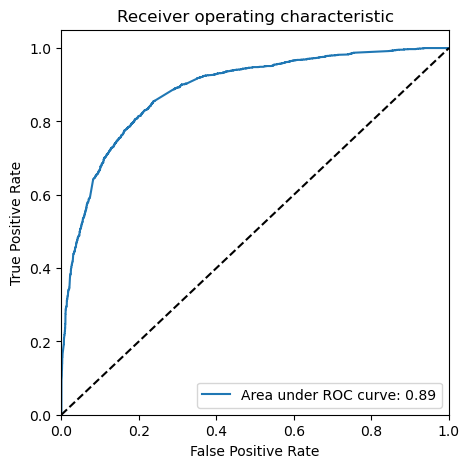

In [81]:
# Draw he ROC curve for training dataset- Area: 0.89
draw_roc(y_train['Converted'], y_train['Predicted_Convert_Prob'])

In [82]:
# Create columns with different probability cutoffs. By reducing the cut off value more leads will turn positive.
# Lower cut off can be used for aggressive conversion.
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train[i]= y_train['Predicted_Convert_Prob'].map(lambda x: 1 if x > i else 0)

y_train.head()

,Converted,Predicted_Convert_Prob,Predicted_Convert,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.183545,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.352765,0,1,1,1,1,0,0,0,0,0,0
9226,0,0.208263,0,1,1,1,0,0,0,0,0,0,0
4750,1,0.878635,1,1,1,1,1,1,1,1,1,1,0
7987,1,0.676037,1,1,1,1,1,1,1,1,0,0,0


In [83]:
# Calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train['Converted'], y_train[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.599591     0.969338     0.367990
0.2   0.2  0.749173     0.920687     0.641741
0.3   0.3  0.798142     0.841783     0.770807
0.4   0.4  0.812628     0.769828     0.839437
0.5   0.5  0.815305     0.702371     0.886044
0.6   0.6  0.811211     0.639820     0.918566
0.7   0.7  0.781294     0.513491     0.949040
0.8   0.8  0.764447     0.437858     0.969014
0.9   0.9  0.716423     0.280867     0.989245


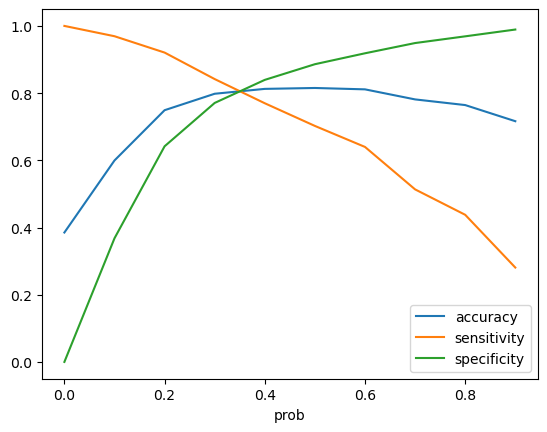

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

# From the below curve .4 seems to be the optimum point for cutoff based on specificity-sensivity-precision curve and precision-recall curve (later created)

In [85]:
# Updating column with 1 if predicted prob > 0.4 else 0
# Change the cutoff_prob value for aggressive campaigh
cutoff_prob = 0.4
y_train['Predicted_Convert'] = y_train['Predicted_Convert_Prob'].map(lambda x: 1 if x > cutoff_prob else 0)
y_train.head()

,Converted,Predicted_Convert_Prob,Predicted_Convert,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.183545,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.352765,0,1,1,1,1,0,0,0,0,0,0
9226,0,0.208263,0,1,1,1,0,0,0,0,0,0,0
4750,1,0.878635,1,1,1,1,1,1,1,1,1,1,0
7987,1,0.676037,1,1,1,1,1,1,1,1,0,0,0


In [86]:
# Create confusion matrix again
confusion = metrics.confusion_matrix(y_train['Converted'], y_train['Predicted_Convert'])
confusion

array([[3278,  627],
       [ 563, 1883]], dtype=int64)

In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Sensitivity of the logistic regression model: 0.77
TP / float(TP+FN)

0.7698282910874897

In [89]:
# Specificity of the logistic regression model: 0.84
TN / float(TN+FP)

0.8394366197183099

In [90]:
# Recall of the logistic regression model: 0.77
recall = TP / (TP + FN)
recall

0.7698282910874897

In [91]:
# Precision of the logistic regression model:0.75
precision = TP / (TP+FP)
precision

0.750199203187251

In [92]:
# Precision recall curve
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train['Converted'], y_train['Predicted_Convert_Prob'])

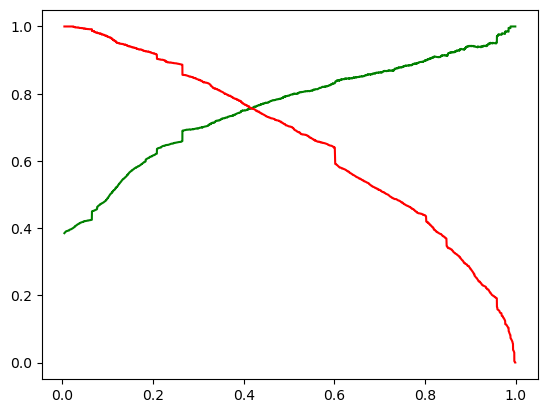

In [93]:
# Precision recall curve plot: cutoff threshold near 0.4
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predict based on test data set

In [94]:
# Scale the test dataset using same scaler used by training data set
X_test[quantitative_cols] = scaler.transform(X_test[quantitative_cols])
X_test.head()

,Prospect ID,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,afc71cc4-67a4-42ae-89f7-779d20c5810d,628652,0,0.015936,0.070530,0.166667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,a8b4e742-2cce-4280-8549-a4a7d51a0fe2,644500,0,0.019920,0.679695,0.208333,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,774a3b07-491d-4311-ad51-b25cc8cc59ec,588935,0,0.007968,0.033243,0.083333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,16b63196-0da9-4b2d-974d-21d8f625f5ef,619437,0,0.000000,0.000000,0.000000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3830,cbd89429-18cd-47b1-9699-21987bd70a8e,623381,0,0.031873,0.073675,0.333333,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# Get the final columns of the training dataset, except the 'const'
model_cols = X_train_sm.columns
model_cols = model_cols[1:]

In [96]:
# Add constant for statsmodel
X_test_sm = sm.add_constant(X_test[model_cols])

In [97]:
# Predict for test data set
y_test_pred = res.predict(X_test_sm)

In [98]:
# View test data set with prediction
y_test_pred.head()

3271    0.125825
1490    0.975001
7936    0.103144
4216    0.880143
3830    0.139486
dtype: float64

In [99]:
# View test y dataset
y_test.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [100]:
# Add predictions to test target dataset
y_test['Predicted_Convert_Prob'] = y_test_pred
y_test.head()

,Converted,Predicted_Convert_Prob
3271,0,0.125825
1490,1,0.975001
7936,0,0.103144
4216,1,0.880143
3830,0,0.139486


In [101]:
# Make predictions based on probability provided by model with threshold of 0.4, same as training data set
cutoff_prob = 0.4
y_test['Predicted_Convert'] = y_test['Predicted_Convert_Prob'].map(lambda x: 1 if x > cutoff_prob else 0)
y_test.head()

,Converted,Predicted_Convert_Prob,Predicted_Convert
3271,0,0.125825,0
1490,1,0.975001,1
7936,0,0.103144,0
4216,1,0.880143,1
3830,0,0.139486,0


### Create test set metrices

In [102]:
# Overall accuracy of the model for test data set: 0.81
from sklearn import metrics
print(metrics.accuracy_score(y_test['Converted'], y_test['Predicted_Convert']))

# Accuracy of 81% appx

0.8123393316195373


In [103]:
# Create confusion matrix for test data set
confusion = metrics.confusion_matrix(y_test['Converted'], y_test['Predicted_Convert'])
confusion

array([[1455,  279],
       [ 232,  757]], dtype=int64)

In [104]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
# Sensitivity of the logistic regression model for test data set: 0.76
TP / float(TP+FN)

0.7654196157735086

In [106]:
# Specificity of the logistic regression model for test data set: 0.84
TN / float(TN+FP)

0.8391003460207612

In [107]:
# Recall of the logistic regression model for test data set: 0.76
recall = TP / (TP + FN)
recall

0.7654196157735086

In [108]:
# Precision of the logistic regression model for test data set: 0.73
precision = TP / (TP+FP)
precision

0.7306949806949807

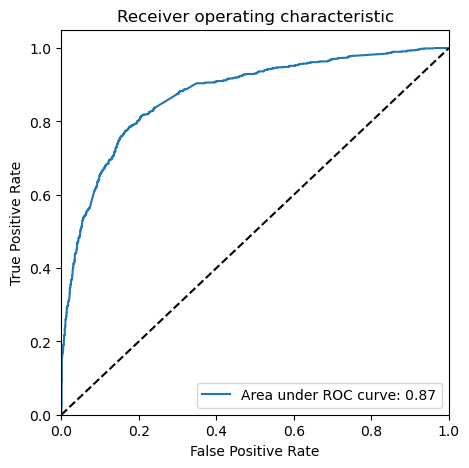

In [109]:
# Draw the ROC curve for test data set- Area: 0.87
draw_roc(y_test['Converted'], y_test['Predicted_Convert_Prob'])

# All test set metrices similar to train set metrices

### Get the customer ID and lead ID in predited data frame

In [110]:
# Append ID columns customer id and lead id to the test prediction dataset
y_test[['Prospect ID', 'Lead Number']] = X_test[['Prospect ID', 'Lead Number']]
y_test.head()

,Converted,Predicted_Convert_Prob,Predicted_Convert,Prospect ID,Lead Number
3271,0,0.125825,0,afc71cc4-67a4-42ae-89f7-779d20c5810d,628652
1490,1,0.975001,1,a8b4e742-2cce-4280-8549-a4a7d51a0fe2,644500
7936,0,0.103144,0,774a3b07-491d-4311-ad51-b25cc8cc59ec,588935
4216,1,0.880143,1,16b63196-0da9-4b2d-974d-21d8f625f5ef,619437
3830,0,0.139486,0,cbd89429-18cd-47b1-9699-21987bd70a8e,623381


In [111]:
# Rearranging the columns
y_test = y_test[['Prospect ID','Lead Number','Converted','Predicted_Convert','Predicted_Convert_Prob']]
y_test.head()

,Prospect ID,Lead Number,Converted,Predicted_Convert,Predicted_Convert_Prob
3271,afc71cc4-67a4-42ae-89f7-779d20c5810d,628652,0,0,0.125825
1490,a8b4e742-2cce-4280-8549-a4a7d51a0fe2,644500,1,1,0.975001
7936,774a3b07-491d-4311-ad51-b25cc8cc59ec,588935,0,0,0.103144
4216,16b63196-0da9-4b2d-974d-21d8f625f5ef,619437,1,1,0.880143
3830,cbd89429-18cd-47b1-9699-21987bd70a8e,623381,0,0,0.139486


In [112]:
# Lead_score can be used to target potential leads (0-100). Its calculated using prediction probability
y_test['Lead_Score'] = round(y_test['Predicted_Convert_Prob'] * 100, 0)
y_test['Lead_Score'] = y_test['Lead_Score'].astype(int)
y_test.head()

,Prospect ID,Lead Number,Converted,Predicted_Convert,Predicted_Convert_Prob,Lead_Score
3271,afc71cc4-67a4-42ae-89f7-779d20c5810d,628652,0,0,0.125825,13
1490,a8b4e742-2cce-4280-8549-a4a7d51a0fe2,644500,1,1,0.975001,98
7936,774a3b07-491d-4311-ad51-b25cc8cc59ec,588935,0,0,0.103144,10
4216,16b63196-0da9-4b2d-974d-21d8f625f5ef,619437,1,1,0.880143,88
3830,cbd89429-18cd-47b1-9699-21987bd70a8e,623381,0,0,0.139486,14


### Summary

In [113]:
# Following are the features the model is pependent on
# TotalVisits(6.5446): Highest coeffecient and most important positive coefficient
# Lead Source_Welingak Website(6.1228): High coeffecient value and important positive coefficient
# Total Time Spent on Website(4.6192): High coeffecient value and important positive coefficient
# Lead Source_Reference(4.0839): High coeffecient value and important positive coefficient
# What is your current occupation_Working Professional(2.1704): Medium coeffecient value and important positive coefficient
# Last Notable Activity_Email Link Clicked(-1.9029): Highest negative coeffecient value and important negative coefficient
# Last Activity_Had a Phone Conversation(1.8806): Low coeffecient value and positive coefficient
# Last Notable Activity_Page Visited on Website(-1.8517): Lowe coeffecient value and negative coefficient
# Last Notable Activity_Modified(-1.7455): Low coeffecient value and important negative coefficient
# Lead Origin_Lead Import(1.6461): Low coeffecient value and positive coefficient
# Do Not Email(-1.6363): Low coeffecient value and negative coefficient
# Last Notable Activity_Olark Chat Conversation(-1.5682): Low coeffecient value and negative coefficient
# Last Notable Activity_Email Opened(-1.4323): Low coeffecient value and negative coefficient
# Lead Source_Olark Chat(1.3463): Low coeffecient value and positive coefficient
# Last Activity_Olark Chat Conversation(-1.3345): Low coeffecient value and negative coefficient
# Last Activity_Email Bounced(-1.2429): Low coeffecient value and negative coefficient
# Last Activity_Converted to Lead(-1.0543): Low coeffecient value and negative coefficient
# What is your current occupation_Unemployed(-0.5916): Very low coeffecient value and negative coefficient
